In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import equinox as eqx

import differt.plotting as dplt
from differt.geometry import TriangleMesh
from differt.geometry.triangle_mesh import (
    triangles_contain_vertices_assuming_inside_same_plane,
)
from differt.rt.image_method import (
    consecutive_vertices_are_on_same_side_of_mirrors,
    image_method,
)
from differt.rt.utils import generate_all_path_candidates, rays_intersect_triangles
from differt.scene.sionna import download_sionna_scenes, get_sionna_scene
from differt.scene.triangle_scene import TriangleScene

In [4]:
download_sionna_scenes()  # Let's download Sionna scenes (from the main branch)

RFBOutputContext()

CanvasBackend(css_height='600px', css_width='800px')
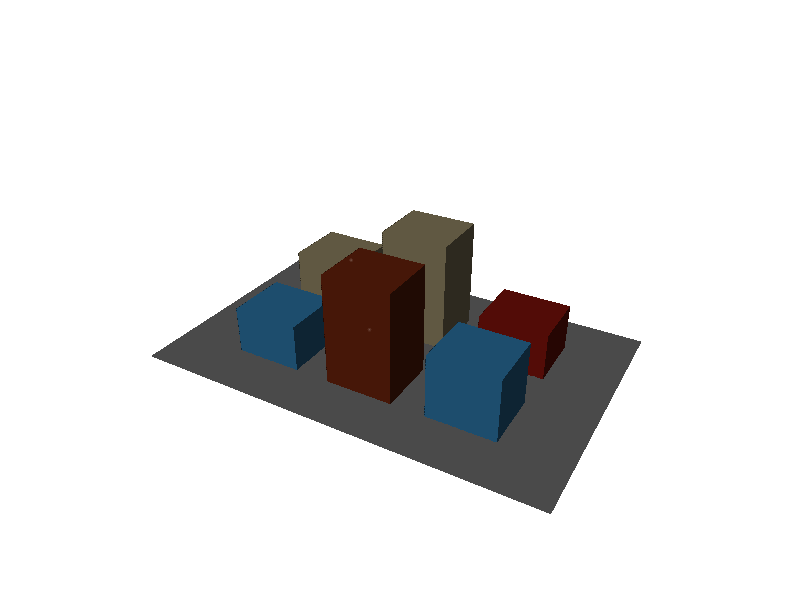

In [7]:
file = get_sionna_scene("simple_street_canyon")
scene = TriangleScene.load_xml(file)
scene = eqx.tree_at(lambda s: s.transmitters, scene, jnp.array([-33,11,32.0]))
scene = eqx.tree_at(lambda s: s.receivers, scene, jnp.array([-20,5,1.5]))
(canvas := scene.plot())

In [8]:
paths = scene.compute_paths(order=2)
canvas = scene.plot()
paths.plot(canvas=canvas)

tx.shape = (1, 3), rx.shape = (1, 3)


NonConcreteBooleanIndexError: Array boolean indices must be concrete; got ShapedArray(bool[5402])

See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.NonConcreteBooleanIndexError